In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat('ex8_movies.mat')
mat1 = loadmat('ex8_movieParams.mat')
X = mat1['X']
theta = mat1['Theta']
y = mat['Y']
R = mat['R']

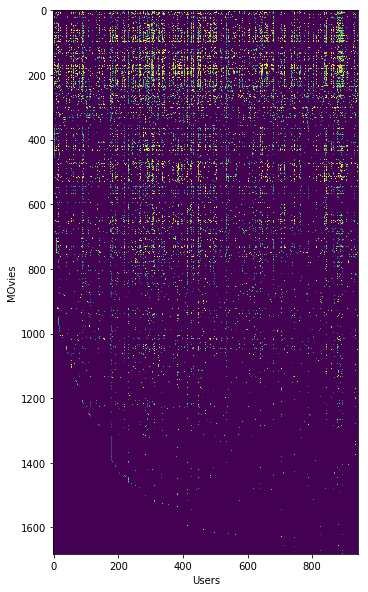

In [3]:
# Visualizing Data
plt.figure(figsize=(12,10))
plt.imshow(y)
plt.xlabel('Users')
plt.ylabel('MOvies')
plt.show()

In [4]:
# Compute Cost function
def computeCost(params, num_users, num_movies, num_features, y, R, lamda):
    
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    theta = params[num_movies*num_features:].reshape(num_users, num_features)
    
    predictions = X @ theta.T
    err = (predictions - y)
    j = 1/2 * np.sum((err**2)*R)
    
    # Regularize cost
    X_reg = lamda/2 * np.sum(theta**2)
    theta_reg = lamda/2 * np.sum(X**2)
    reg_cost = j + X_reg + theta_reg
    
    # Gradient
    X_grad = err*R @ theta
    theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(), theta_grad.flatten())
    
    # Compute regularize Gradient
    reg_X_grad = X_grad + lamda*X
    reg_theta_grad = theta_grad + lamda*theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_theta_grad.flatten())
    
    return j, grad, reg_cost, reg_grad

In [5]:
num_users, num_movies, num_features = 4,5,3
X_test = X[:num_movies,:num_features]
theta_test= theta[:num_users,:num_features]
y_test = y[:num_movies,:num_users]
R_test = R[:num_movies,:num_users]
params = np.append(X_test.flatten(),theta_test.flatten())

cost, grad = computeCost(params, num_users, num_movies, num_features, y_test, R_test, 0)[:2]
cost2,grad2= computeCost(params, num_users, num_movies, num_features, y_test, R_test, 1.5)[2:]                    
print('Cost & Grad without Lamda: ',cost,',\n with Lamda: ',cost2)

Cost & Grad without Lamda:  22.224603725685675 ,
 with Lamda:  31.34405624427422


In [6]:
# Learning Movie Recommendation
movieList = open('movie_ids.txt', 'r').read().split('\n')[:-1]
np.set_printoptions(threshold=100)
movieList

['1 Toy Story (1995)',
 '2 GoldenEye (1995)',
 '3 Four Rooms (1995)',
 '4 Get Shorty (1995)',
 '5 Copycat (1995)',
 '6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 '7 Twelve Monkeys (1995)',
 '8 Babe (1995)',
 '9 Dead Man Walking (1995)',
 '10 Richard III (1995)',
 '11 Seven (Se7en) (1995)',
 '12 Usual Suspects, The (1995)',
 '13 Mighty Aphrodite (1995)',
 '14 Postino, Il (1994)',
 "15 Mr. Holland's Opus (1995)",
 '16 French Twist (Gazon maudit) (1995)',
 '17 From Dusk Till Dawn (1996)',
 '18 White Balloon, The (1995)',
 "19 Antonia's Line (1995)",
 '20 Angels and Insects (1995)',
 '21 Muppet Treasure Island (1996)',
 '22 Braveheart (1995)',
 '23 Taxi Driver (1976)',
 '24 Rumble in the Bronx (1995)',
 '25 Birdcage, The (1996)',
 '26 Brothers McMullen, The (1995)',
 '27 Bad Boys (1995)',
 '28 Apollo 13 (1995)',
 '29 Batman Forever (1995)',
 '30 Belle de jour (1967)',
 '31 Crimson Tide (1995)',
 '32 Crumb (1994)',
 '33 Desperado (1995)',
 '34 Doom Generation, The (1995)',
 '35

In [7]:
# Initialize rating
my_rating = np.zeros((1682,1))
my_rating[0]=4
my_rating[3]=3
my_rating[44]=1
my_rating[56]=4
my_rating[123]=5
my_rating[345]=2
my_rating[444]=3
my_rating[501]=1
my_rating[555]=3
my_rating[666]=5

print('New user Rating\n')

for i in range(len(my_rating)):
    if my_rating[i] > 0 :
        print('User Rating ',int(my_rating[i]) ,' for index ',movieList[i])

New user Rating

User Rating  4  for index  1 Toy Story (1995)
User Rating  3  for index  4 Get Shorty (1995)
User Rating  1  for index  45 Eat Drink Man Woman (1994)
User Rating  4  for index  57 Priest (1994)
User Rating  5  for index  124 Lone Star (1996)
User Rating  2  for index  346 Jackie Brown (1997)
User Rating  3  for index  445 Body Snatcher, The (1945)
User Rating  1  for index  502 Bananas (1971)
User Rating  3  for index  556 Wild Bill (1995)
User Rating  5  for index  667 Audrey Rose (1977)


In [8]:
def normalizeRatings(Y, R):
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
        
    return Ynorm, Ymean

In [9]:
def gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lamda):

    # unfold the parameters
    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)
    
    J_history =[]
    
    for i in range(num_iters):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad = computeCost(params,num_users, num_movies, num_features,Y, R, Lamda)[2:]
        
        # unfold grad
        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)
    
    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history

In [10]:
Y = np.hstack((my_rating,y))
R =np.hstack((my_rating!=0,R))

# Normalize Ratings
Ynorm, Ymean = normalizeRatings(Y, R)

In [11]:

num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

# Set initial Parameters (Theta,X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lamda = 10

# Optimize parameters using Gradient Descent
paramsFinal, J_history = gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,0.001,400,Lamda)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

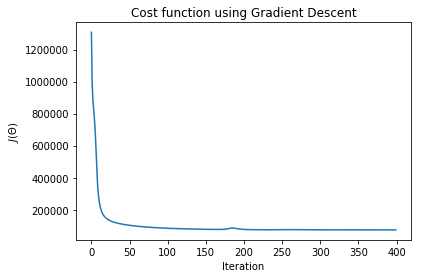

In [13]:
# Ploting Cost Function
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [14]:
# unfold paramaters
X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)

# Predict rating
p = X @ Theta.T
my_predictions = p[:,0][:,np.newaxis] + Ymean

In [15]:
df = pd.DataFrame(np.hstack((my_predictions,np.array(movieList)[:,np.newaxis])))
df.sort_values(by=[0],ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)

In [16]:
print("Top recommendations for you:\n")
for i in range(10):
    print("Predicting rating",round(float(df[0][i]),1)," for index",df[1][i])

Top recommendations for you:

Predicting rating 9.1  for index 50 Star Wars (1977)
Predicting rating 7.6  for index 318 Schindler's List (1993)
Predicting rating 7.5  for index 408 Close Shave, A (1995)
Predicting rating 7.5  for index 483 Casablanca (1942)
Predicting rating 7.5  for index 64 Shawshank Redemption, The (1994)
Predicting rating 7.4  for index 12 Usual Suspects, The (1995)
Predicting rating 7.4  for index 169 Wrong Trousers, The (1993)
Predicting rating 7.3  for index 603 Rear Window (1954)
Predicting rating 7.3  for index 272 Good Will Hunting (1997)
Predicting rating 7.3  for index 114 Wallace & Gromit: The Best of Aardman Animation (1996)
